<a href="https://colab.research.google.com/github/DevVagabond/tensorflow-ml-templates/blob/main/tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

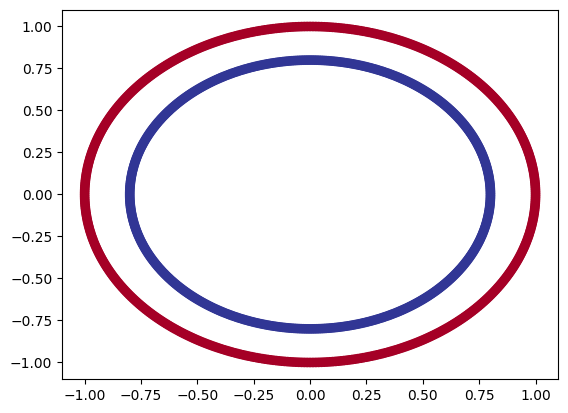

In [ ]:
X,y = make_circles(n_samples=1000,random_state=42);

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((800, 2), (200, 2), (800,), (200,))

# Binary classification

In [ ]:
binary_model = tf.keras.Sequential([
   tf.keras.Input(shape=(2,)),
   tf.keras.layers.Dense(20, activation="relu"),
   tf.keras.layers.Dense(20, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile

binary_model.compile(loss=tf.losses.BinaryCrossentropy,
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=["accuracy"]
                     );

binary_model.fit(X_train,y_train,epochs=150);


Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4935 - loss: 0.6926
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4744 - loss: 0.6921
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4807 - loss: 0.6891
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5124 - loss: 0.6866
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4956 - loss: 0.6880
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5253 - loss: 0.6814
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5246 - loss: 0.6811
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.6800
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5474 - loss: 0.6737
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5810 - loss: 0.6785 
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6179 - loss: 0.6727
Epoch 12/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [ ]:
y_predict_binary = binary_model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
binary_model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0014


[0.0014562264550477266, 1.0]

In [ ]:
y_test[0], y_predict_binary[0]

(np.int64(1), array([0.99809974], dtype=float32))

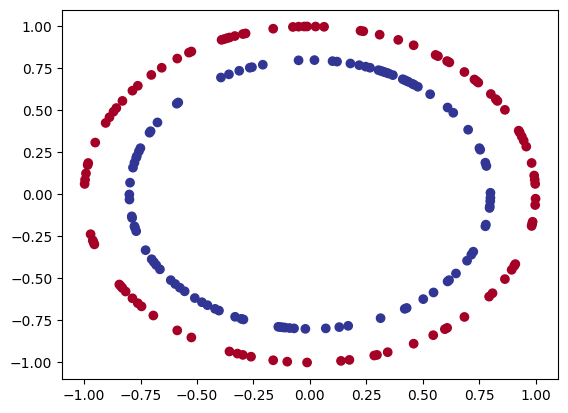

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_predict_binary,cmap=plt.cm.RdYlBu)
#there should not be any red in the inner cirle

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_predict_binary>0.8)
cf

array([[100,   0],
       [  0, 100]])

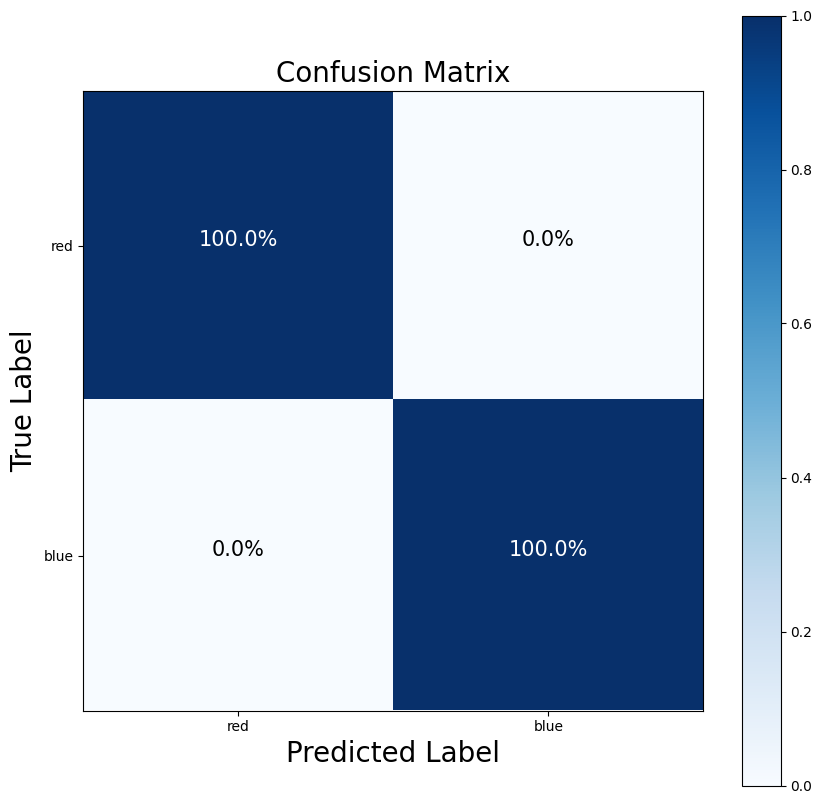

In [ ]:
import itertools

def plot_confusion_matrix(y_test,y_pred,class_names=[],figsize=(10,10)):
  cf_mat = confusion_matrix(y_test,y_pred)

  cm_norm = cf_mat.astype("float")/cf_mat.sum(axis=1)[:,np.newaxis]

  n_classes = cf_mat.shape[0]

  fig,ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm_norm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  classes = len(class_names) != 0

  if classes:
      labels = class_names
  else:
      labels = np.arange(cm_norm.shape[0])

  ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

  threshold = (cm_norm.max()+cm_norm.min())/2

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)


  for i,j in itertools.product(range(cm_norm.shape[0]),range(cm_norm.shape[1])):
      plt.text(j,i,f"{cm_norm[i,j]*100:.1f}%",
              horizontalalignment="center",
              color="white" if cm_norm[i,j]>threshold else "black",
              size=15
              )


plot_confusion_matrix(y_test,y_predict_binary>0.8,class_names=["red","blue"])





# Use CategoricalCrossEntropy function if the data is one-hot encoded , if the labels are in integer form use SparseCategoricalCrossEntropy:

### **https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy **

# Multiclass classification


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train_mc,y_train_mc),(X_test_mc,y_test_mc) = fashion_mnist.load_data()


model_mc = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
]);

model_mc.compile(loss=tf.losses.SparseCategoricalCrossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

model_mc.fit(X_train_mc,y_train_mc,epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1080 - loss: 3.5592
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2432 - loss: 1.8068
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3260 - loss: 1.6073
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3497 - loss: 1.5397
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4316 - loss: 1.3839
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4500 - loss: 1.2873
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4575 - loss: 1.2603
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4605 - loss: 1.2462
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4549 - loss: 1.2585
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4604 - loss: 1.2385
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4600 - loss: 1.2503
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━

In [ ]:
y_predict_mc = model_mc.predict(X_test_mc);


evalute_mc = model_mc.evaluate(X_test_mc,y_test_mc)

evalute_mc



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5455 - loss: 1.0661


[1.067207932472229, 0.5429999828338623]

In [ ]:

cf_mc = confusion_matrix(y_test_mc,np.argmax(y_predict_mc,axis=1))
cf_mc

array([[777,   3,  38,  36,   6,   3, 130,   0,   6,   1],
       [  6, 962,   4,  15,   5,   0,   5,   0,   3,   0],
       [ 11,   1, 749,   6, 196,   2,  33,   0,   1,   1],
       [ 41,  34,  16, 787,  50,   2,  67,   0,   3,   0],
       [  0,   1,  93,  33, 833,   0,  35,   0,   5,   0],
       [  1,   0,   1,   0,   0, 942,   0,  31,   3,  22],
       [163,   1, 196,  23, 147,   6, 449,   0,  15,   0],
       [  0,   0,   0,   0,   0,  26,   0, 960,   0,  14],
       [  2,   2,   8,   3,  13,  13,   8,   6, 945,   0],
       [  1,   1,   0,   0,   0,  19,   0,  69,   1, 909]])

In [ ]:
mc_classes = ["T-shirt/top", "Trouser", "Pullover","Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


y_predict_mc_int = y_predict_mc.argmax(axis=1)

y_predict_mc.shape, y_predict_mc_int.shape




((10000, 10), (10000,))

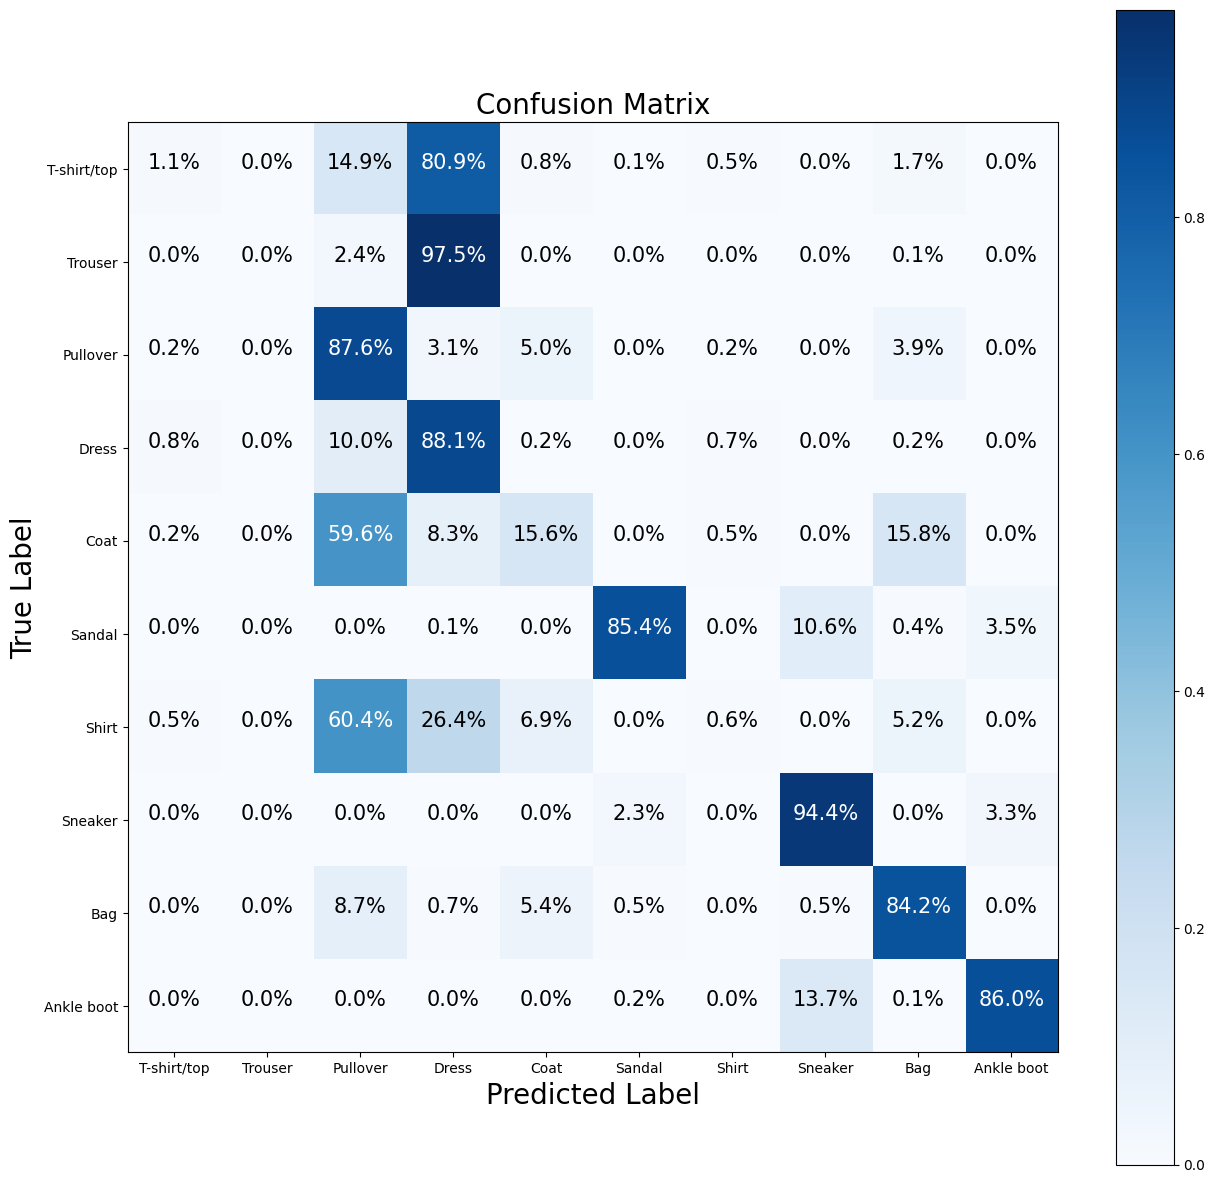

In [ ]:
plot_confusion_matrix(y_test_mc,y_predict_mc_int,class_names=mc_classes,figsize=(15,15))

In [ ]:
#normalize the data set before traing

X_train_mc_norm = X_train_mc/255
X_test_mc_norm = X_test_mc/255

model_mc_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
]);

model_mc_norm.compile(loss=tf.losses.SparseCategoricalCrossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

model_mc_norm.fit(X_train_mc_norm,y_train_mc,epochs=20, validation_data=(X_test_mc_norm,y_test_mc))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6890 - loss: 0.8930 - val_accuracy: 0.8327 - val_loss: 0.4714
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8477 - loss: 0.4282 - val_accuracy: 0.8487 - val_loss: 0.4277
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8576 - loss: 0.3948 - val_accuracy: 0.8549 - val_loss: 0.4081
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8654 - loss: 0.3790 - val_accuracy: 0.8575 - val_loss: 0.4002
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8695 - loss: 0.3609 - val_accuracy: 0.8485 - val_loss: 0.4228
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8744 - loss: 0.3488 - val_accuracy: 0.8584 - val_loss: 0.4001
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8728 - loss: 0.3490 - val_accuracy: 0.8586 - val_loss: 0.3944
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3411 -

In [ ]:
model_mc_norm.evaluate(X_test_mc_norm,y_test_mc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8665 - loss: 0.3761


[0.3841906487941742, 0.8651000261306763]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


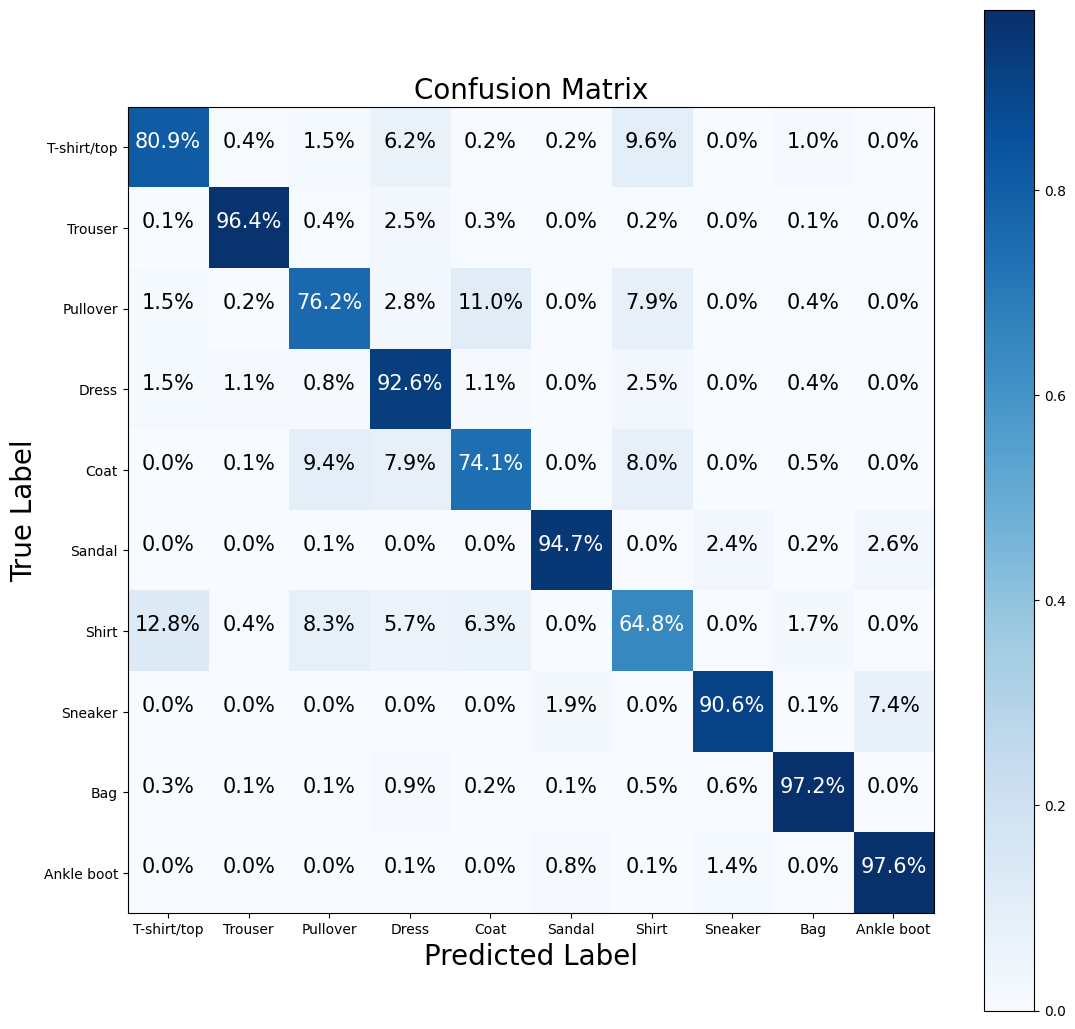

In [ ]:
y_predict_norm = model_mc_norm.predict(X_test_mc_norm)

y_predict_norm_int = y_predict_norm.argmax(axis=1)

plot_confusion_matrix(y_test_mc,y_predict_norm_int,class_names=mc_classes,figsize=(13,13))